## Convolutional Neural Networks for Image Classification

In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()     

11493376/11490434 [==============================] - 5s 0us/step


##### We did tuple unpacking in the above step

In [4]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image = x_train[0]

In [12]:
single_image.shape

(28, 28)

##### We just grabbed one single image in the above step

Since x_train[0] is a 2-D image data, we can use matplotlib built-in method to display 2-D image data

### Visualizing the image data

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

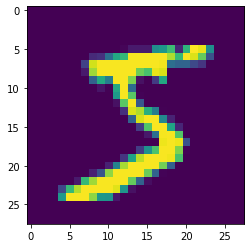

In [13]:
plt.imshow(single_image)

##### We can see that 5 showing up and mnist dataset is essentially gray-scale and hence the values only go from 0 to 255

##### One might question that why we are getting color image for gray-scale dataset. Well the image shown up is just one type of color mapping and matplotlib uses different color maps and we can choose any one of them but by default it will be viridis and hence it is kind of showing with purple colored image

### PreProcessing the data 

##### `Labels`

##### We first need to make sure that the `labels will be understandable by CNN`

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

##### Hence in the array above the very first value is 5 which corresponds to the very first value in our training set

##### But the labels above are literally just the numbers they represent. So when we pass these training_labels as such, the network would assume it was some sort of continuous value and it would try to predict stuff like 5.5 or 5.6 etc., 

##### But those values are actually categories i.e., 5 is not just a number it's a category five

* `We are actually doing a classification problem and we must make sure that our network should understand this`

##### Hence we have to OneHotEncode the values of the label

In [16]:
y_train.shape

(60000,)

##### So we have 60k labelled numbers and by OneHotEncoding we need to transform each of those numbers to represent a Category

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
y_example = to_categorical(y_train)

In [19]:
y_example.shape

(60000, 10)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

##### Now there is 1 at index position 5 which it tells that the very first label belongs to class 5

##### So it transformed the value 5 of the very first actual train_label into an entire row 

##### So let's convert both train and test labels into categorical labels

In [21]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [22]:
y_cat_train = to_categorical(y_train, num_classes=10)

##### to_categorical will check all the unique values initially and then OneHotEncodes those values into categorical values. Here no.of different categorical labels = no.of unique numbers in the actual train or test label

##### But there might be an instance where a unique value is missing in the train_set but comes in the test_set. For instance, 3 is missing in the train_set but appears in the test_set

##### So we have to specify this argument called num_classes

##### For any machine learning model to work properly we should have all the possible classes both in train and test sets or else there is a problem with the datset

###### `Train data`

###### Normalize the training data (X_train)

In [23]:
single_image.max()

255

In [25]:
single_image.min()

0

##### To make sure I don't run into `gradient problems` these should be scaled between 0 and 1

In [26]:
x_train = x_train/255

In [27]:
x_test = x_test/255

##### The reason we did this on test_set is because most often the future images in which the network hasn't seen before containg R,G,B will have the values between 0 and 255. So we need to scale those future image values as well 

##### I must make sure that my scaling essentially should be the same for present images and future images as well when dealing with image data

In [32]:
scaled_single = x_train[0]

In [33]:
scaled_single.max()

1.0

In [34]:
scaled_single.min()

0.0

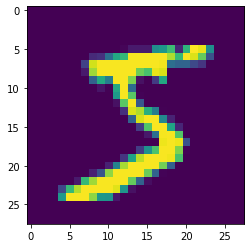

In [35]:
plt.imshow(scaled_single)

##### Since the ratio of everything is still the same, the scaled image should look pretty much exactly the same as earlier

##### `Reshape the data`

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
x_test.shape

(10000, 28, 28)

##### Right now our data is 60,000 images stored in 28x28 pixel array formation

##### This is correct for a CNN, but we need to add one more dimension to let the network know that we are dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), a color image would have 3 dimensions

###### `Reshape to include channel dimension (in this case, 1 channel)`

In [40]:
x_train = x_train.reshape(60000, 28, 28, 1)     # batch_size, width, height, color_channels 

In [44]:
x_test = x_test.reshape(10000, 28, 28, 1)

### Create a Model

In [45]:
from tensorflow.keras.models import Sequential

In [48]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

##### Conv2D and MaxPool2D layers for handling those 2D images and then we have to flatten out these images to fit into our final dense layers which will actually perform the classification

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), padding='valid', input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

'''
We have to flatten out the 28x28 pixels image array to 28*28=784 data points 
before sending it to the final fully connected dense layer  

'''

model.add(Flatten())

model.add(Dense(128, activation='relu'))

'''
Generally in the dense layer we keep the no.of neurons = no.of i/p data points coming to this layer

Here, no.of data points = 784 which are from the previous layer

But it's ok to keep 128 neurons

'''

# The last layer is the classifier, so there should be one neuron for each class in the classifiaction layer

model.add(Dense(10, activation='softmax'))

'''
softmax because we are using multi-class classification

'''

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Check the range of Keras_metrics we can use here : [metrics](https://keras.io/metrics/)

---------
---------
##### Now let's see what `aspects` of the model we can play around with vs what aspects of the model we have to set 

###### `parameters that are fixed and should be determined by our actual dataset :`

* `input_size`=(28,28,1) : this input size should match what an image is going to look like in our datacase it's 28x28 and 1 color channel. So this input_size is determined by our data

* `flatten layer` : our data should be flatten. So this flattening layer should be somewhere in the network

* output dense layer and the `no.of neurons` basically equal to no.of classes and the type of `activation function`, and `loss function` based on the problem type`. These are fixed according to our data

###### `parameters that we can play with:`

* no.of convoultional and pooling layers

* arguments like kernel_size, no.of filters, padding, pool_size and type of activation function in the convolutional layers

* no.of hidden dense layers and no.of neurons inside them

* Mostly after falttening is done we often use just 1 or 2 hidden dense layers because most of the work is done by convolutional and dense layers

----------------
--------------

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


###### In order to make sure not to worry about no.of epochs we use EarlyStopping

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

In [53]:
'''
We can use monitor='val_accuracy' since we included this metric in model.compile

'''

early_Stop = EarlyStopping(monitor='val_loss', patience=2)

### Training the Model

In [55]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=10, callbacks=[early_Stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 26s 440us/sample - loss: 0.1417 - accuracy: 0.9578 - val_loss: 0.0549 - val_accuracy: 0.9819
Epoch 2/10
60000/60000 [==============================] - 24s 404us/sample - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0457 - val_accuracy: 0.9844
Epoch 3/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.0311 - accuracy: 0.9901 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 4/10
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0364 - val_accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 25s 412us/sample - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0395 - val_accuracy: 0.9874


### Model Evaluation

In [57]:
model.metrics_names

['loss', 'accuracy']

In [58]:
metrics = pd.DataFrame(model.history.history)

In [59]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141701,0.957800,0.054925,0.9819
1,0.047043,0.985583,0.045724,0.9844
2,0.031146,0.990150,0.035168,0.9879
3,0.021678,0.992883,0.036424,0.9879
4,0.014388,0.995417,0.039455,0.9874


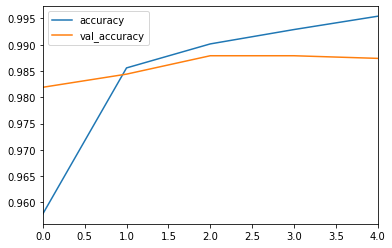

In [60]:
metrics[['accuracy', 'val_accuracy']].plot()

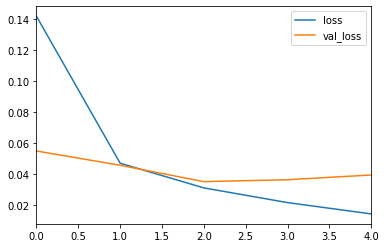

In [61]:
metrics[['loss', 'val_loss']].plot()

In [66]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))
print(model.evaluate(x_train, y_cat_train, verbose=0))

['loss', 'accuracy']
[0.039454932381032266, 0.9874]
[0.009569195747024303, 0.9973]


##### The above o/p values will be same as the values displayed in the model.fit

In [67]:
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
predictions = model.predict_classes(x_test)

In [70]:
y_cat_test.shape

(10000, 10)

In [71]:
y_test.shape

(10000,)

In [73]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

###### Now x_test shape and dimensions should match with label we are going to use and hence we have to use y_test

In [74]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [75]:
print(confusion_matrix(y_test, predictions))

[[ 970    0    3    0    0    0    3    2    2    0]
 [   2 1125    1    0    0    0    2    3    2    0]
 [   2    1 1017    1    0    0    1    9    1    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    1    1  964    0    5    0    2    9]
 [   1    1    0    8    0  878    2    0    2    0]
 [   4    1    0    1    1    1  949    0    1    0]
 [   0    2    4    0    0    0    0 1018    2    2]
 [   2    1    4    2    0    0    1    3  960    1]
 [   1    1    0    6    1    3    0    6    4  987]]


(10, 0)

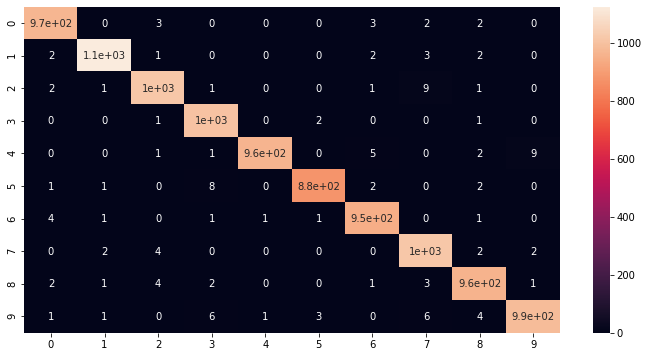

In [80]:
plt.figure(figsize=(12,6))

import seaborn as sns

sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

plt.ylim(10,0)

In [76]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [77]:
predictions[0]

7

### Predicting a given Image

In [88]:
my_number = x_test[0]

In [89]:
my_number.shape

(28, 28, 1)

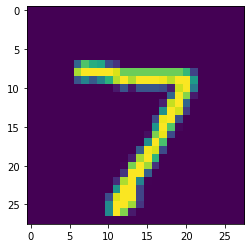

In [90]:
plt.imshow(my_number.reshape(28,28))

In [92]:
# SHAPE >>>>>>>>>> (num_images, width, height, color_channels)\

model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)